This Notebook is prepared to analyze, visualiza and predict the stocks price using the time series recurrent neural network technique (LSTM) using the past 60 days closing stock price. 

In [ ]:
#pip install yfinance --upgrade --no-cache-dir


In [179]:

# importing all necessory libraries
%matplotlib inline
import os
import math
import yfinance as yf
import pandas_datareader.data as web
from datetime import datetime
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
import matplotlib.dates as mpl_dates
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential



In [180]:
# Set the start and end date
start_date = '2012-01-01'
end_date = '2021-07-12'

# Set the ticker
ticker = 'AAPL'

# Get the data
df = yf.download(ticker, start_date, end_date)

# Print 5 rows for earliest prices
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-02,137.899994,140.000000,137.750000,139.960007,139.960007,78852600
2021-07-06,140.070007,143.149994,140.070007,142.020004,142.020004,108181800
2021-07-07,143.539993,144.889999,142.660004,144.570007,144.570007,104911600
2021-07-08,141.580002,144.059998,140.669998,143.240005,143.240005,105575500
2021-07-09,142.750000,145.649994,142.649994,145.110001,145.110001,99788400


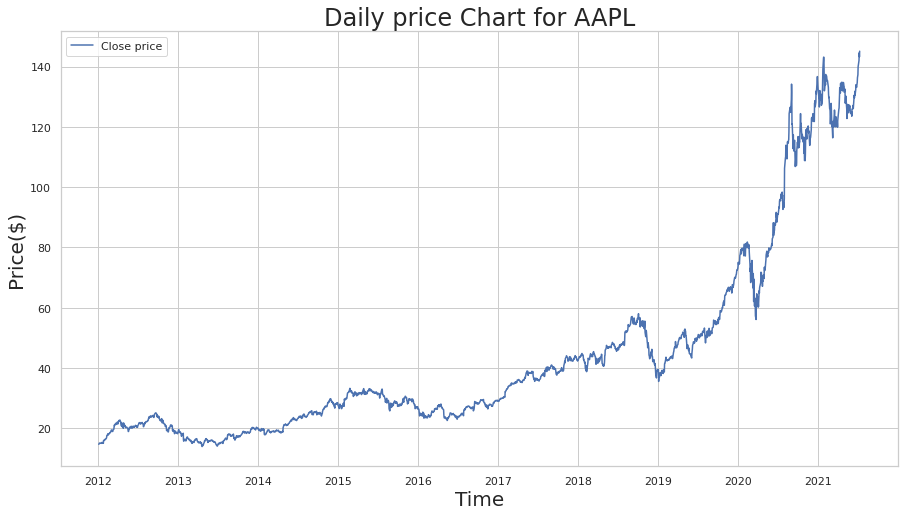

In [82]:
# closing price history chart

sns.set_theme(style="whitegrid")
plt.figure(figsize = (15, 8))
plt.plot(df['Close'], label = 'Close price')
plt.title('Daily price Chart for %s' %ticker, fontsize = 24)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Price($)', fontsize = 20)
plt.legend()
plt.show()


In [66]:
# creating a numpy array for closing price only
data = df.filter(['Close'])

close = data.values

# setting the train-test ratio
len_train = math.ceil(len(close) * 0.7)
len_train

1677

In [67]:
# transforming closing price with min-max scaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_close = scaler.fit_transform(close)
scaled_close

array([[0.00563641],
       [0.00623817],
       [0.00748798],
       ...,
       [0.99588302],
       [0.98574291],
       [1.        ]])

In [68]:
# train-test split
train_data = scaled_close[0:len_train, :]

x_train = []
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
    # checking data for first pass
    if (i <= 60):
        print(x_train)
        print('*******')
        print(y_train)
    # checking data for second pass    
    if (i <= 61):
        print(x_train)
        print('*******')
        print(y_train)

[array([0.00563641, 0.00623817, 0.00748798, 0.00867789, 0.00849546,
       0.00890661, 0.00871873, 0.00840288, 0.00797266, 0.00930416,
       0.01050496, 0.01013465, 0.00810608, 0.01004207, 0.00813603,
       0.01528366, 0.01473091, 0.01545248, 0.0170127 , 0.01795754,
       0.01787858, 0.01758723, 0.01882888, 0.019997  , 0.02132034,
       0.02345782, 0.02794788, 0.02801595, 0.03051559, 0.03238349,
       0.0291732 , 0.03040939, 0.03038488, 0.03385114, 0.03335829,
       0.03427046, 0.03590965, 0.03682183, 0.03944943, 0.04136362,
       0.04191637, 0.04210971, 0.03883678, 0.03804713, 0.03816422,
       0.04124111, 0.04210699, 0.04396673, 0.0483506 , 0.0541994 ,
       0.05310479, 0.05310751, 0.05733618, 0.05865952, 0.05771738,
       0.05685696, 0.05596112, 0.05893724, 0.06097943, 0.06183442])]
*******
[0.05972144312109347]
[array([0.00563641, 0.00623817, 0.00748798, 0.00867789, 0.00849546,
       0.00890661, 0.00871873, 0.00840288, 0.00797266, 0.00930416,
       0.01050496, 0.0101346

In [69]:
# converting x_train and y_train to numpy array
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train.shape

(1617, 60)

In [70]:
# reshaping the data

x_train = np.reshape(x_train, (x_train.shape[0], 60, 1))
x_train.shape

(1617, 60, 1)

In [71]:
# model fitting

from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf

model = tf.keras.Sequential()

model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))


In [83]:
# compile the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [84]:
# model training
model.fit(x_train, y_train, batch_size = 1, epochs =  2)

Epoch 1/2
1617/1617 [==============================] - 38s 22ms/step - loss: 1.3122e-04
Epoch 2/2
1617/1617 [==============================] - 35s 22ms/step - loss: 1.0027e-04


the above parameters are fitted after a hit and trial process to get the minimum squared error

In [85]:
# creating the test data

test_data = scaled_close[len_train - 60: , :]

x_test = []
y_test = close[len_train: , :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [86]:
# convert test data to numpy array and reshaping

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [87]:
# predict output with model
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

In [88]:
# rms error
rmse = np.sqrt(np.mean(pred - y_test)**2 ) 
rmse

1.7088406809857297

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



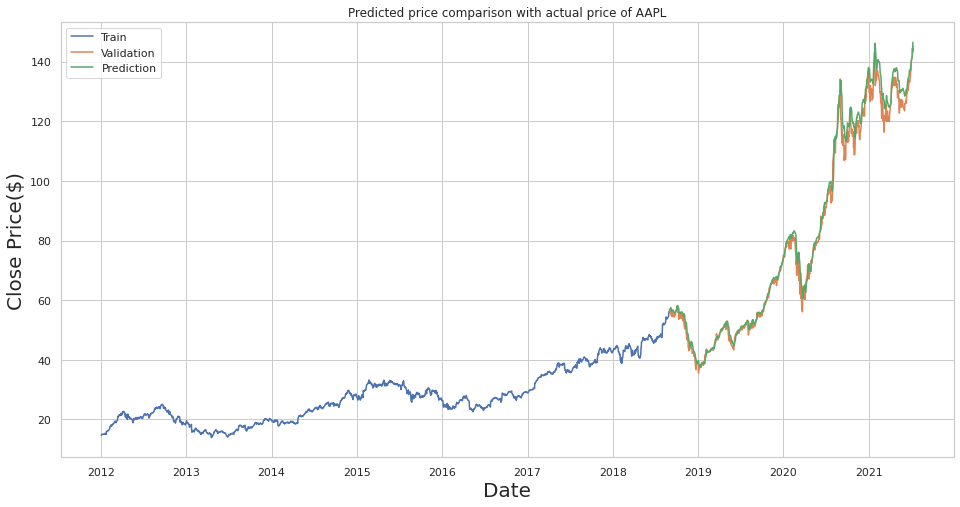

In [148]:
# plotting the predicted price with actual price

# setting the data to plot
train = data[:len_train]
valid = data[len_train:]
valid['Predictions'] = pred

# price visualization 
plt.figure(figsize = (16, 8))
plt.title('Predicted price comparison with actual price of %s' %ticker)


plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Close Price($)', fontsize = 20)
plt.legend(['Train', 'Validation', 'Prediction'])
plt.show()



In [149]:
# validation and predicted prices and % error

valid['pct_Difference'] = abs(1 - valid['Predictions'] / valid['Close']) * 100
valid


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Predictions,pct_Difference
Date,,,
2018-08-31,56.907501,56.142033,1.345110
2018-09-04,57.090000,56.773479,0.554424
2018-09-05,56.717499,57.296535,1.020914
2018-09-06,55.775002,57.525600,3.138680
2018-09-07,55.325001,57.315022,3.596965
...,...,...,...
2021-07-02,139.960007,140.282135,0.230157
2021-07-06,142.020004,141.622726,0.279734
2021-07-07,144.570007,143.335281,0.854068


In [138]:
# minimum and maximum % difference

print(valid['pct_Difference'].max())
print(valid['pct_Difference'].min())

16.063012290200863
0.020355026719087732


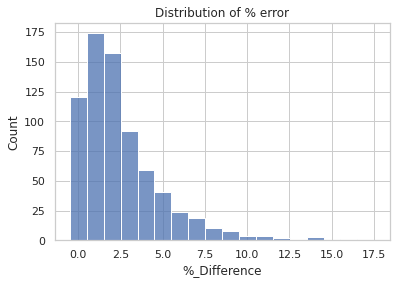

In [142]:
# Distribution of errors
sns.histplot(data = valid, x = 'pct_Difference', discrete=True, cbar = True)
plt.title('Distribution of % error')
plt.show()


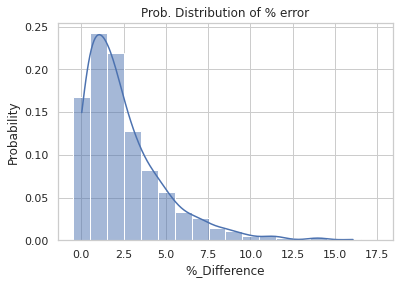

In [143]:
# probability distribution of errors
sns.set_theme(style="whitegrid")
sns.histplot(data = valid, x = 'pct_Difference', kde = True, stat="probability", discrete=True, cbar = True)
plt.title('Prob. Distribution of % error')
plt.show()


the probability of error more than 2.5% price difference is very less, hence the model is well fitted (also the RMS error is very low)